# Decision Trees

- Can perform *multipleoutput* tasks
- DT are the fundamental components of Random Forests

## Training & Viz a DT

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

- Visualize the traind DT

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="./output/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True,
)


In [ ]:
!dot -Tpng output/iris_tree.dot -o output/iris_tree.png

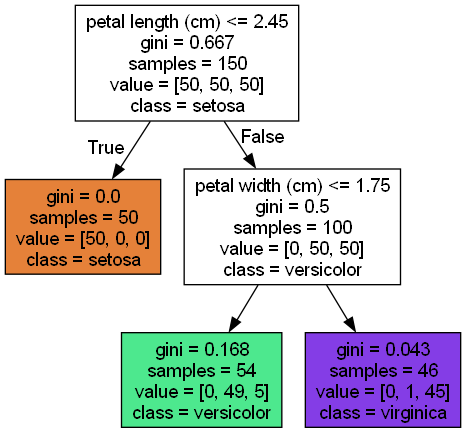

## Making Predictions

- *leaf note*: with no child notes
- Just follow instructions and move down the tree
- `samples` attribute: how many training instances it applies to?
- `value` shows how many of each labels get categorized in each of the leaves.
- `gini` attribute: measure of *impurity*
 - "pure": gini = 0 (orange leaf above) meaning **all training instances it applies to belong to the same class**

 $$
 G_i = 1 - \sum_{k=1}^n P_{i,k}^2
 $$

- `max_depth` = 2 ⇒ Two splits
  - Two decision boundaries (should add as long as there is impurity)

DT is a *white box* model.

## Estimating Class Probabilities

- Given, flower with: 5cm long x 1.5 cm wide (look at the `value`)
    - Setosa: 0/54
    - Versicolor: 49/54
    - Virginica: 5/54

- It gives the same probability for any flower that reaches the green leaf... even if that flower is more likely than this one. (limitation, you cannot compare between flowers in the same leaf)

In [ ]:
print(0/54, 49/54, 5/54, sep="\t")
print(*tree_clf.predict_proba([[5,1.5]]))
print("prediction:", tree_clf.predict([[5,1.5]]))

0.0	0.9074074074074074	0.09259259259259259
[0.         0.90740741 0.09259259]
prediction: [1]


## The CART Training Algorithm

- How to choose the splitting rule: $k$ feature and $t_k$ threshold?
 - Find the pair that produces the purest subsets (weighted by their size)
 - So, its the sumproduct(Gini Index, Size)

- Use the same logic to split subsequent  sub-sets till the maximum depth is reached. Other stopping conditions:
 - `min_samples_split`
 - `min_samples_leaf`
 - `min_weight_fraction_leaf`
 - `max_leaf_nodes`

- It is a **Greedy Algorithm**. Finding the *optimal tree* is the *NP-Complete* Problem ($O(\exp(m))$)





## Computational Complexity

- GT generally approximately balanced (making predictions require: $O(\log_2(m))$  times 1 (checking value of one feature) => It is the prediction complexity.

- Small training sets. The training time can be sped up by presorting the data (`pre_sort=True`)



## Gini Impurity or Entropy?

- Another impurity: *Entropy* (thermodynamics: Molecular disorder. Entropy = 0 if "molecules are still and well ordered")
- Entropy = 0 if all instances are from one class.

$$
H_{i} = -  \underset{P_{i,k} \neq 0}{{\sum_{k=1}^n}} P_{i,k} \log_{2}\left(p_{i,k}\right)
$$

- Doesn't really make a different (similar trees obtained most of the times)
 - Gini slightly faster to compute. But tries to isolate most freq class.
 - Enntropy produces slightly more balanced trees

## Regularization Hyperparameters

- Doesn't make assumptions about data (linear or not etc)
- DT can overfit severely if *nonparameteric* (the number of parameters is not determined *prior* to training). *Parameteric* has predetermined number of parameters (e.g. normal distribution, $\mu$ and $\sigma$)
- Some parameters for regularization
    - `max_depth` = None (unlimited by default)
    - `min_samples_split` (min number of samples a node needs to be splitted)
    - `min_samples_leaf` (min number of samples a leaf node must have)
    - `min_weight_fraction_leaf` (same as above, but expressed as a fraction of total number of weighted instances)

- Reduce `max_*` and increase `min_*` to regularize

- Other algo run by pruning (deleting) unnecessary nodes of an unrestricted (unregularized) DT
 - Use a $\chi^2$ test to check if the purity improvement by making the split on a leaf is significant or just happened randomly


## Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
export_graphviz(
    tree_reg,
    out_file="./output/iris_tree_reg.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True,
)


In [ ]:
!dot -Tpng output/iris_tree_reg.dot -o output/iris_tree_reg.png

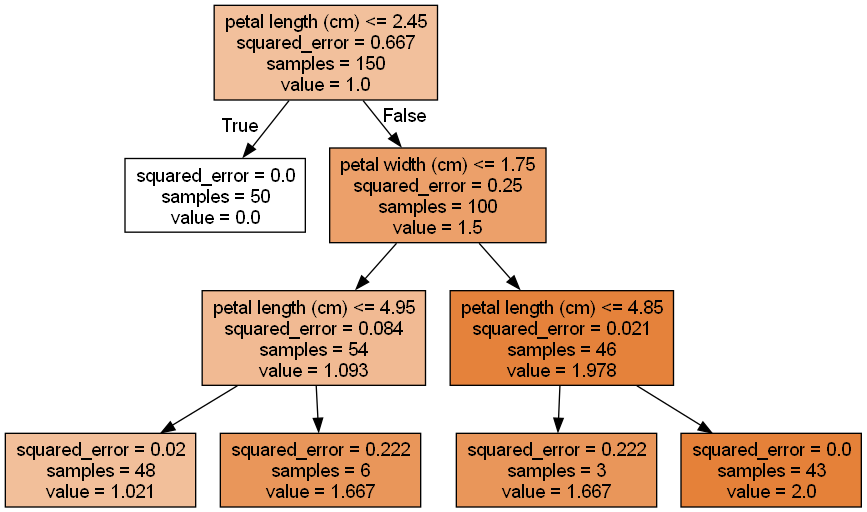

- Prediction `value` is the average target value of the instances within that class. E.g (False, True, True) leads to `value=`$1.021$ which is the average of 48 instances' target values and for those instances the `squared_ error = $0.02$

- Split the training set to minimize $MSE$

- DON'T USE THE **DEFAULT Hyperparameters**. It will overfit

## Instability

- Orthogonal Decision boundaries (sensitive to training set rotation) so rotation will make a simple DT unnecessarily convoluted.
    - This will not generalize well.
    - PCA to solve this issue.

- We will get very different models on the same training data (stochasticity (starting point/split feature)
    - Random forests can limit this instability by averaging predicitons over many trees

